In [112]:
import networkx as nx

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

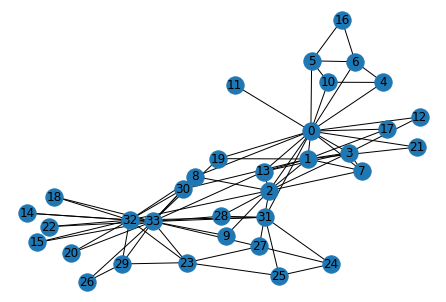

In [3]:
nx.draw(G, with_labels = True)

In [12]:
def average_degree(num_edges,num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of 
    # the graph. Round the result to nearest integer (for example 
    # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)
    avg_degree = 0
    avg_degree = int(num_edges/num_nodes)
    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges,num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 2


In [24]:
def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)
    
    avg_cluster_coef = 0
    avg_cluster_coef = round(nx.average_clustering(G),3)
    
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.571


In [25]:
def one_iter_pagerank(G,beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.
    
    r1 = 0
    d_id = len(G.edges(node_id))
    r1 = round(beta*(r0/d_id) + (1-beta), 3)
    
    return r1

beta = 0.8
r0 = 1/G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.201


In [28]:
def closeness_centrality(G, node = 5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.
    
    closeness = 0
    closeness = round(nx.closeness_centrality(G, u = node),3)
    
    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.384


# Graph to tensor

In [29]:
import torch
print(torch.__version__)

1.4.0


In [47]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.
    edge_list = []
    edge_list = list(set(G.edges()))
    
    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].
    edge_index = torch.tensor([])
    edge_index = torch.as_tensor(pos_edge_list)   
    
    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([78, 2])
The pos_edge_index tensor has sum value 2535


In [59]:
pos_edge_list[0]
pos_edge_list[0][1]

31

In [65]:
import random

def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation 
    # works on the karate club network. In this implementation, self loop should 
    # not be considered as either a positive or negative edge. Also, notice that 
    # the karate club network is an undirected graph, if (0, 1) is a positive 
    # edge, do you think (1, 0) can be a negative one?
    neg_edge_list = []
    pos_edge_list = graph_to_edge_list(G)
    for edge in pos_edge_list:
        if edge[1] - edge[0]:
            neg_edge_list.append(edge)
    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

The neg_edge_index tensor has shape torch.Size([78, 2])


# Node Embedding Learning

In [69]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.4.0


In [70]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4,embedding_dim=8)
print("Sample embedding layer: {}".format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [78]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


In [87]:
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change 
    # the values of num_node and embedding_dim. The weight matrix of returned 
    # layer should be initialized under uniform distribution. 
    
    emb = None
    
    emb = nn.Embedding(num_embeddings=num_node,embedding_dim=embedding_dim)
    
    return emb

emb = create_node_emb()
ids = torch.LongTensor([0,3])

print("Embedding: {}".format(emb))
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
         -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
          0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward>)


## Visualize the initial node embedding

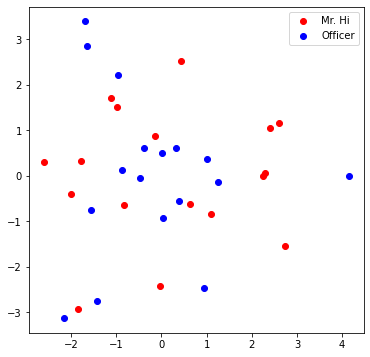

In [84]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6,6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x,club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x,club2_y, color="blue",label="Officer")
    plt.legend()
    plt.show()
    
    
visualize_emb(emb)

## Training the embedding

In [155]:
from torch.optim import SGD
def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.
    accu = 0.0
    
    accu = mean(int(pred) - label)
    
    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (as a sanity check, the loss should decrease during training)
    epochs = 500
    learning_rate = 0.1
    losses = []
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
    
    for i in range(epochs):
        total_loss = 0
        emb.zero_grad()
        pred = emb(train_edge)
        DOT = torch.zeros(4,4)
        for i in range(len(train_label)):
            for j in range(len(train_label)):
                DOT[i,j] = torch.tensordot(pred[:,i,:],pred[:,j,:])
        
        DOT = sigmoid(DOT)
        LOSS = loss_fn(sum(DOT)/4,train_label)
        
        LOSS.backward()
        optimizer.step()
        
        total_loss += LOSS
        losses.append(total_loss)
    print(losses)
    
loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate labels
pos_label = torch.ones(pos_edge_index.shape[1],)
neg_label = torch.zeros(neg_edge_index.shape[1], )
# Concatenate labels

train_label = torch.cat([pos_label,neg_label],dim = 0)

train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
train(emb, loss_fn, sigmoid, train_label, train_edge)

[tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>), tensor(0.6931, grad_fn=<AddBackward0>),